#### [ KNN기반 분류 모델 - 생선 품종 분류 ]
- 데이터셋 : fish.csv
- 주제 : 2가지 생선 품종을 분류 ==> 2진 분류
- 타겟 : Species
- 피쳐 : length, weight 중 선택
- 학습종류 : 지도학습 /분류
- 알고리즘 : KNN 기반 분류진행

In [394]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화
from sklearn.neighbors import KNeighborsRegressor
                                #knn
from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
                            ## 정규화, 컬럼추가
                            
import RegressionModule as rem

In [395]:
fishDF = pd.DataFrame(pd.read_csv('../data/fish.csv', usecols=[0,1,2]))
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [396]:
specList = list(fishDF['Species'].unique())

breamDF = fishDF.loc[fishDF['Species'] =='Bream']
smeltDF = fishDF.loc[fishDF['Species'] =='Smelt']

In [397]:
boolidx = list(breamDF.index)
boolidx.extend(list(smeltDF.index))

boolidx = ((fishDF['Species'] =='Bream')|(fishDF['Species'] =='Smelt'))

In [398]:
# fishDF.loc[((fishDF['Species'] =='Bream')|(fishDF['Species'] =='Smelt')),:]
dataDF = fishDF[boolidx]

[3] 데이터정리

In [399]:
## 3-1 인덱스 정리
dataDF.reset_index(drop=True,inplace=True)
dataDF.index

RangeIndex(start=0, stop=49, step=1)

In [400]:
dataDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [401]:
## 3-2 타겟 컬럼의 object => int 변환
from sklearn.preprocessing import LabelEncoder

#타겟 컬럼의 인코더 labelEncoder()
labelEn = LabelEncoder()
labelEn.fit(dataDF['Species'])
print(f"labelEn : {labelEn.classes_}")

# - str => int 인코딩
targetNP = labelEn.transform(dataDF['Species'])
print(f"tragetNP: {type(targetNP)}, {targetNP.shape}, {np.unique(targetNP)}")

labelEn : ['Bream' 'Smelt']
tragetNP: <class 'numpy.ndarray'>, (49,), [0 1]


In [402]:
## [3-3] 피쳐 추출
featureNP = dataDF[dataDF.columns[1:]].values

print(f"featureNP : {type(featureNP)}, {featureNP.shape}")

featureNP : <class 'numpy.ndarray'>, (49, 2)


In [403]:
featureNP

array([[ 242. ,   25.4],
       [ 290. ,   26.3],
       [ 340. ,   26.5],
       [ 363. ,   29. ],
       [ 430. ,   29. ],
       [ 450. ,   29.7],
       [ 500. ,   29.7],
       [ 390. ,   30. ],
       [ 450. ,   30. ],
       [ 500. ,   30.7],
       [ 475. ,   31. ],
       [ 500. ,   31. ],
       [ 500. ,   31.5],
       [ 340. ,   32. ],
       [ 600. ,   32. ],
       [ 600. ,   32. ],
       [ 700. ,   33. ],
       [ 700. ,   33. ],
       [ 610. ,   33.5],
       [ 650. ,   33.5],
       [ 575. ,   34. ],
       [ 685. ,   34. ],
       [ 620. ,   34.5],
       [ 680. ,   35. ],
       [ 700. ,   35. ],
       [ 725. ,   35. ],
       [ 720. ,   35. ],
       [ 714. ,   36. ],
       [ 850. ,   36. ],
       [1000. ,   37. ],
       [ 920. ,   38.5],
       [ 955. ,   38.5],
       [ 925. ,   39.5],
       [ 975. ,   41. ],
       [ 950. ,   41. ],
       [   6.7,    9.8],
       [   7.5,   10.5],
       [   7. ,   10.6],
       [   9.7,   11. ],
       [   9.8,   11.2],


[4] 기계학습준비<hr>

In [404]:
##학습용 테스트용 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureNP,
                                                        targetNP,
                                                        random_state=42,
                                                        stratify=targetNP
                                                        )
# straitify -> 분류시 적용. 
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {y_test.ndim}D, {y_test.shape}")


X_train => 2D (36, 2) / X_test => 2D, (13, 2)
y_train => 1D (36,) / y_test => 1D, (13,)


In [405]:
np.unique_counts(y_train),np.unique_counts(y_test)

(UniqueCountsResult(values=array([0, 1]), counts=array([26, 10])),
 UniqueCountsResult(values=array([0, 1]), counts=array([9, 4])))

[5] 학습진행<hr>

In [406]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifer = KNeighborsClassifier()
knnClassifer.fit(X_train, y_train)



KNeighborsClassifier()

In [407]:
# 분류모델 성능 체크 ==> 정확도 accuracy 가 성능체크로 사용됨

score_test = knnClassifer.score(X_test, y_test)
score_test = knnClassifer.score(X_train, y_train)
score_test

1.0

[6] 성능지표 평가<hr>


In [408]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score


In [409]:
## 예측값 계산
pre_ = knnClassifer.predict(X_test)
precision = precision_score(y_test, pre_)
recall = recall_score(y_test,pre_)
f1 = f1_score(y_test,pre_)

print(pre_, precision, recall, f1)

[0 0 0 1 1 0 1 0 1 0 0 0 0] 1.0 1.0 1.0


In [410]:
## 분류성능평가 보고서
classification_report(y_test, pre_,output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 13.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 13.0}}

In [411]:
## 오차행렬
confusion_matrix(y_test,pre_)

array([[9, 0],
       [0, 4]])

[7] 예측 및 시각화 <hr>

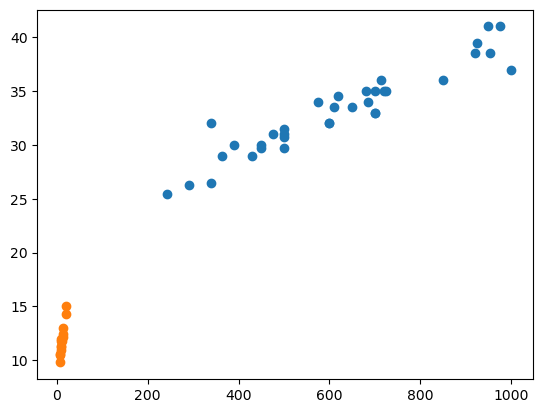

In [412]:
plt.plot(breamDF['Weight'], breamDF['Length'], 'o', label= 'Bream')
plt.plot(smeltDF['Weight'], smeltDF['Length'], 'o', label = 'Smelt')

In [413]:
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)

# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)

In [414]:
plt.scatter(X_train.loc[:,'Weight'], X_train.loc[:,'Length'], c=y_train)


plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
# 스칼라 베겉 매트릭스

In [ ]:
new_data = np.array([[200., 24.]])

## 예측하기 스칼라 반환-> 0차원. item()메소드로 값 추출가능.
pre_new_data = knnClassifer.predict(new_data)
# knnClassifer.classes_

# labelEn.classes_[pre_new_data].item()

c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_train

,Weight,Length
26,720.0,35.0
3,363.0,29.0
40,8.7,11.3
9,500.0,30.7
39,9.8,11.2
30,920.0,38.5
42,9.9,11.8
15,600.0,32.0
43,9.8,12.0
27,714.0,36.0


In [ ]:
distance, neighborIdx = knnClassifer.kneighbors([[190., 14.]])
neighborIdx.reshape(-1)
neighborIdx[0].tolist()

c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[11, 15, 28, 29, 20]

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

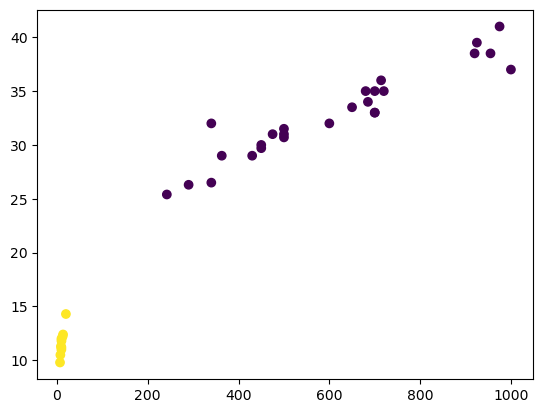

In [ ]:
plt.scatter(X_train.loc[:,'Weight'], X_train.loc[:,'Length'], c=y_train, label='Data')
# plt.plot(X_train.iloc[neighborIdx][:,0], X_train.iloc[neighborIdx][:,1], 'r^', label='neighbor')

# plt.plot(X_train.iloc[neighborIdx,0], X_train.iloc[neighborIdx,1], 'r^', label='neighbor')
plt.plot(X_train.iloc[neighborIdx][:,0], X_train[neighborIdx][:,1], 'r^', label='neighbor')

plt.plot(new_data[0][0], new_data[0][1], 'bo',label = 'new data')
plt.grid()

plt.legend()
plt.show()

In [ ]:
###스케일러 적용후 해보기. 
y_train[neighborIdx]

array([0, 0, 0, 0, 0])

In [ ]:
### 과제 iris 분류코드.
### 과제 타이타닉 생존. 로지스틱, knn classfier 